# Actividad de evaluación: &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;    21/03/2023
# Introducción a Machine Learning con Python

In [1]:
#Importaciones

#Tratamiento de dataset
import pandas as pd
import numpy as np

#OneHotEncoder
from sklearn.preprocessing import OneHotEncoder

#Visualización
import matplotlib.pyplot as plt
import seaborn as sns

#Métricas de evaluación
from sklearn import metrics

#Time
import time
import os
import re

## Ejercicio 1: Lectura del data set y preprocesamiento
### 1.1 Lectura del dataset
Realizar la lectura del dataset e imprimir la información de sus columnas.<br>
Mostrar por pantalla el contenido de las 5 primeras filas. <br>
Mostrar una descripción de los estadísticos principales de la columnas numéricas.

In [2]:
BARC_DIA_LABORAL = pd.read_csv('./data/barcelona_weekdays.csv')
BARC_DIA_LABORAL['weekends'] = 0

In [3]:
BARC_DIA_LABORAL1 = BARC_DIA_LABORAL.drop(['room_shared', 'room_private', 'person_capacity', 'multi', 'biz',
                                           'guest_satisfaction_overall', 'dist', 'metro_dist', 'attr_index',
                                           'attr_index_norm', 'rest_index', 'rest_index_norm'], axis=1)

In [4]:
def limpiar_csv(lab,finde):
    #añadimos una columna booleana y su valor dependera si es del csv del finde o no (1 si es fin de semana)
    lab['weekends'] = 0
    finde['weekends'] = 1
    #quitamos las columnas que no vamos a usar
    lab = lab.drop(['room_shared', 'room_private', 'person_capacity', 'multi', 'biz',
                                           'guest_satisfaction_overall', 'dist', 'metro_dist', 'attr_index',
                                           'attr_index_norm', 'rest_index', 'rest_index_norm'], axis=1)
        
    finde = finde.drop(['room_shared', 'room_private', 'person_capacity', 'multi', 'biz',
                                       'guest_satisfaction_overall', 'dist', 'metro_dist', 'attr_index',
                                       'attr_index_norm', 'rest_index', 'rest_index_norm'], axis=1)
    
    return lab,finde

In [5]:
BARC_DIA_LABORAL1[:5]

,Unnamed: 0,realSum,room_type,host_is_superhost,cleanliness_rating,bedrooms,lng,lat,weekends
0,0,474.317499,Entire home/apt,False,10.0,1,2.17556,41.39624,0
1,1,169.897829,Private room,True,10.0,1,2.14906,41.38714,0
2,2,161.984779,Private room,False,9.0,1,2.15357,41.37859,0
3,3,367.956804,Entire home/apt,False,10.0,1,2.16839,41.37390,0
4,4,196.895292,Private room,False,9.0,1,2.15238,41.37699,0


In [6]:
BARC_FIN_D_SEM = pd.read_csv('./data/barcelona_weekends.csv')
BARC_FIN_D_SEM['weekends'] = 1
BARC_FIN_D_SEM1 = BARC_FIN_D_SEM.drop(['room_shared', 'room_private', 'person_capacity', 'multi', 'biz',
                                           'guest_satisfaction_overall', 'dist', 'metro_dist', 'attr_index',
                                           'attr_index_norm', 'rest_index', 'rest_index_norm'], axis=1)

In [7]:
BARC_FIN_D_SEM1[:5]

,Unnamed: 0,realSum,room_type,host_is_superhost,cleanliness_rating,bedrooms,lng,lat,weekends
0,0,532.036214,Entire home/apt,False,10.0,1,2.17556,41.39624,1
1,1,169.897829,Private room,True,10.0,1,2.14906,41.38714,1
2,2,196.895292,Private room,False,9.0,1,2.16500,41.38300,1
3,3,141.271208,Private room,False,9.0,1,2.15342,41.37912,1
4,4,715.200037,Entire home/apt,True,9.0,2,2.17498,41.39214,1


In [8]:
merged_df = pd.concat([BARC_DIA_LABORAL1, BARC_FIN_D_SEM1], axis=0, ignore_index=True)
merged_df[:6]

,Unnamed: 0,realSum,room_type,host_is_superhost,cleanliness_rating,bedrooms,lng,lat,weekends
0,0,474.317499,Entire home/apt,False,10.0,1,2.17556,41.39624,0
1,1,169.897829,Private room,True,10.0,1,2.14906,41.38714,0
2,2,161.984779,Private room,False,9.0,1,2.15357,41.37859,0
3,3,367.956804,Entire home/apt,False,10.0,1,2.16839,41.37390,0
4,4,196.895292,Private room,False,9.0,1,2.15238,41.37699,0
5,5,330.951661,Entire home/apt,False,9.0,2,2.18197,41.40842,0


In [9]:
merged_df = merged_df.rename(columns={'Unnamed: 0': 'Id'})
merged_df[:6]

,Id,realSum,room_type,host_is_superhost,cleanliness_rating,bedrooms,lng,lat,weekends
0,0,474.317499,Entire home/apt,False,10.0,1,2.17556,41.39624,0
1,1,169.897829,Private room,True,10.0,1,2.14906,41.38714,0
2,2,161.984779,Private room,False,9.0,1,2.15357,41.37859,0
3,3,367.956804,Entire home/apt,False,10.0,1,2.16839,41.37390,0
4,4,196.895292,Private room,False,9.0,1,2.15238,41.37699,0
5,5,330.951661,Entire home/apt,False,9.0,2,2.18197,41.40842,0


In [10]:
def union_csv(lab,finde):
    union = pd.concat([lab, finde], axis=0, ignore_index=True)
    #cambiar el nombre de la columna 1, que está vacio a ID
    union = union.rename(columns={'Unnamed: 0': 'Id'})
    #voy a ordenarlos por id
    union = union.sort_values(by="Id")
    return union

In [11]:
#merged_df.to_csv('barcelona.csv', index=False)

In [12]:
BARC_DIA_LABORAL1.info()
print("\n")
BARC_FIN_D_SEM1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1555 entries, 0 to 1554
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0          1555 non-null   int64  
 1   realSum             1555 non-null   float64
 2   room_type           1555 non-null   object 
 3   host_is_superhost   1555 non-null   bool   
 4   cleanliness_rating  1555 non-null   float64
 5   bedrooms            1555 non-null   int64  
 6   lng                 1555 non-null   float64
 7   lat                 1555 non-null   float64
 8   weekends            1555 non-null   int64  
dtypes: bool(1), float64(4), int64(3), object(1)
memory usage: 98.8+ KB


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1278 entries, 0 to 1277
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0          1278 non-null   int64  
 1   realSum             127

In [13]:
carpeta = 'data'  
lista_csv = []
ruta_carpeta = os.path.join(os.getcwd(), carpeta)  

archivos = os.listdir(ruta_carpeta)#lista con los nombres de los archivos de nuestra carpeta

for archivo in archivos:
    lista_csv.append(archivo)
    #print(archivo)

In [14]:
#ahora queremos que cada archivo de finde y entre semana se junten con los de su misma ciudad, haciendo todos los cambios antes
#declarados como quitar las columnas que no vamos a usar o añadir la columna
path = './data/' 
for i in range(0,len(lista_csv),2):
    lab = lista_csv[i]; finde = lista_csv[i+1]
    laborable =  pd.read_csv(path+lab)
    weekend =  pd.read_csv(path+finde)
    #aplicar las funciones de cambios
    laborable, weekend = limpiar_csv(laborable,weekend)
    #uniones de ambos dataframes
    union = union_csv(laborable,weekend)
        
    #para conseguir el nombre de la ciudad que estamos tratando, podemos usar expresiones regulares.
    ciudad = lab.split("_")[0]
    nombre = 'datos filtrados/'+ciudad +'.csv'
    #print(ciudad)
    #generar el nuevo csv con el nombre de la ciudad
    #el mode w es para activar la sobreescritura
    union.to_csv(nombre, index=False,mode='w')

In [15]:

carpeta2 = 'datos filtrados'
ruta_carpeta = os.path.join(os.getcwd(), carpeta2)  
lista_ciudades = []
archivos = os.listdir(ruta_carpeta)#lista con los nombres de los archivos de nuestra carpeta
#dataframe vacio como acumulador
total = pd.DataFrame()
path2 = './datos filtrados/'
for archivo in archivos:       
    ciudad = archivo.split(".")[0]
    #pasar el csv a data frame
    doc = pd.read_csv(path2+archivo)
    #añadir una columna con el nombre de la ciudad a la que pertenece
    doc['Ciudad'] = ciudad
    lista_ciudades.append(ciudad)
    #meterlo en el csv global (creo que el concat es lo que mejor funcionaria)
    total = pd.concat([total, doc], axis=0, ignore_index=True)
total.to_csv('AirBNB.csv', index=False,mode='w')

In [35]:

def buscador(ciudad,precio_min,precio_max,habitaciones,tipo):
    df = pd.read_csv('./AirBNB.csv')
    if ciudad in lista_ciudades:
        df = df.drop(df[df['Ciudad'] != ciudad].index)
    df = df.drop(df[(df['realSum'] < precio_min) & (df['realSum'] < precio_max)].index)
    df = df.drop(df[df['bedrooms'] != habitaciones].index)
    if tipo != '':
        df = df.drop(df[df['room_type'] != tipo].index)
    df.to_csv('busqueda.csv', index=False,mode='w')
    print(df)
buscador('amsterdam',200.0,350.0,2,'')
#las room_type son: Private room, Entire home/apt 

        Id      realSum        room_type  host_is_superhost  \
5        2   482.975183     Private room              False   
6        3   433.529398     Private room              False   
10       5  1001.804420  Entire home/apt              False   
11       5   552.808567     Private room              False   
17       8  1001.804420  Entire home/apt              False   
...    ...          ...              ...                ...   
2042  1065   538.513814  Entire home/apt              False   
2054  1077   388.067396  Entire home/apt              False   
2065  1088  1062.967216  Entire home/apt               True   
2069  1092   792.772948  Entire home/apt               True   
2070  1093   909.474375  Entire home/apt              False   

      cleanliness_rating  bedrooms      lng       lat  weekends     Ciudad  
5                    9.0         2  4.89417  52.37663         1  amsterdam  
6                    9.0         2  4.89417  52.37663         0  amsterdam  
10          

In [17]:
from statistics import mode

## Ejercicio 2. Visualización

En este apartado queremos realizar un análisis exploratorio de los datos, apoyándonos de la visualización. En concreto, nos gustaría estudiar las frecuencias y distribuciones de distintos atributos en función del tipo de producción (*Film* o *Series*).

Para ello, queremos realizar las distintas representaciones gráficas:

### 2.1 Diagramas de tarta

Mostrar un diagrama de tarta con la frecuencia de aparición de los géneros principales para cada uno de estos conjuntos:
    a) Todas las series y películas
    b) Solamente para las series
    c) Solamente para las películas
    
Muestra en cada diagrama los porcentajes de cada género principal y responde a estas preguntas:

    ¿Cuál es el género principal más frecuente en las series?
    ¿Cuál es el género principal más frecuente en las películas?

Grafica Barcelona días laborales


<Axes: ylabel='room_type'>

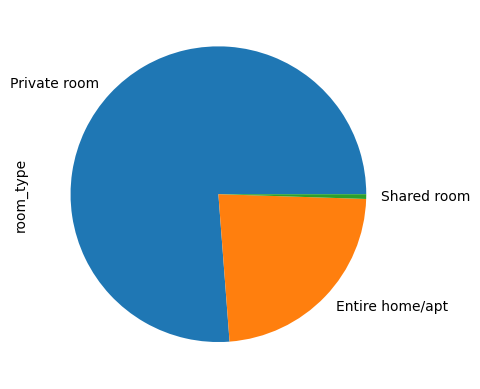

In [18]:
print("Grafica Barcelona días laborales")
BARC_DIA_LABORAL['room_type'].value_counts().plot(kind='pie')

Barcelona Fin de Semana


<Axes: ylabel='room_type'>

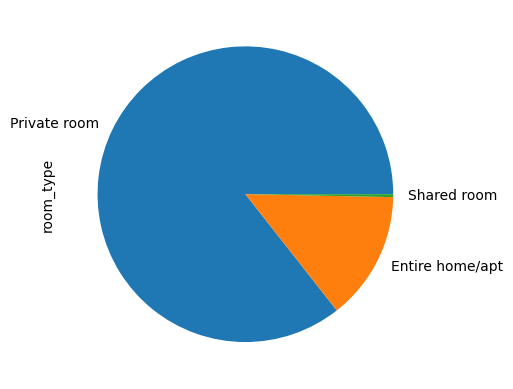

In [19]:
print("Barcelona Fin de Semana")
BARC_FIN_D_SEM['room_type'].value_counts().plot(kind='pie')

In [20]:
print("Barcelona días laborales", BARC_DIA_LABORAL['room_type'].value_counts())
print("\n")
print("Barcelona fin de semana", BARC_FIN_D_SEM['room_type'].value_counts())

Barcelona días laborales Private room       1185
Entire home/apt     362
Shared room           8
Name: room_type, dtype: int64


Barcelona fin de semana Private room       1094
Entire home/apt     180
Shared room           4
Name: room_type, dtype: int64


<Axes: ylabel='room_type'>

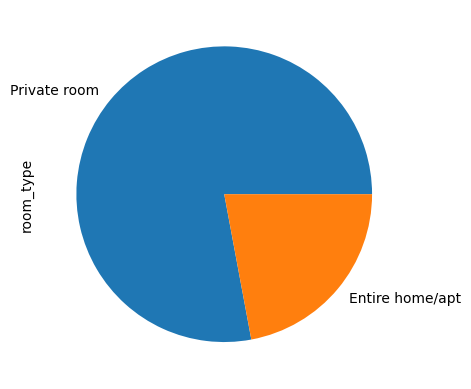

In [21]:
BARC_DIA_LABORAL[(BARC_DIA_LABORAL['host_is_superhost'] == True)]['room_type'].value_counts().plot(kind='pie')

<Axes: ylabel='room_type'>

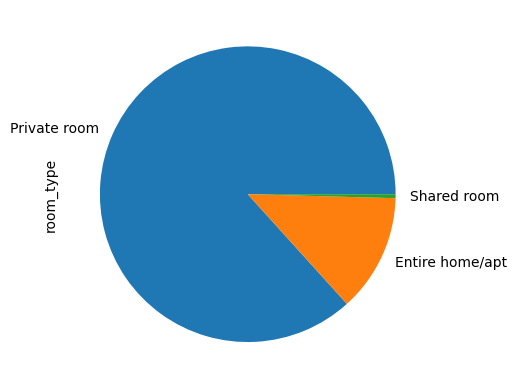

In [22]:
BARC_FIN_D_SEM[(BARC_FIN_D_SEM['host_is_superhost'] == True)]['room_type'].value_counts().plot(kind='pie')